<a href="https://colab.research.google.com/github/fvergara24/Datathon_FVM/blob/main/FVM_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Descripción del Problema
Nos da la tarea de implementar un modelo que nos permita predecir la cantidad de bicicletas que se alquilan según la información contenida en el dataset puesto a disposición.

##Objetivo
Predecir la cantidad de bicicletas (cnt) que se alquilan 

##LIBRERÍAS

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## DATOS 

In [2]:
train=pd.read_excel('/content/drive/MyDrive/PI2/bike_train.xlsx')
test=pd.read_excel('/content/drive/MyDrive/PI2/bike_test.xlsx')

## EXPLORACIÓN
Se utiliza el Dataset Train para la exploración 

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [4]:
px.scatter(train, x='dteday',y='cnt').show()

In [5]:
px.scatter(train, x='season',y='cnt').show()

In [6]:
px.scatter(train, x='dteday',y='cnt',color='weekday').show()

In [7]:
train.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000,11999.000000
mean,6000.000000,2.210684,0.279523,5.530294,11.556630,0.027752,3.009334,0.684057,1.435036,0.465704,0.448888,0.625770,0.196433,30.049837,128.545129,158.594966
std,3463.957275,1.088798,0.448784,3.433005,6.911891,0.164269,2.005264,0.464910,0.650894,0.188576,0.169633,0.200637,0.125394,43.596915,124.692750,151.392952
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3000.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.320000,0.303000,0.470000,0.104500,3.000000,29.000000,34.000000
50%,6000.000000,2.000000,0.000000,5.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.460000,0.454500,0.620000,0.194000,13.000000,98.000000,118.000000
75%,8999.500000,3.000000,1.000000,8.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.620000,0.590900,0.790000,0.283600,39.000000,185.000000,232.000000
max,11999.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,0.960000,1.000000,1.000000,0.850700,367.000000,770.000000,957.000000


In [8]:
train.groupby(by='weekday').mean()

,instant,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weekday,,,,,,,,,,,,,,,
0,5938.528005,2.197783,0.281797,5.420653,11.557176,0.000000,0.000000,1.366394,0.451867,0.436282,0.627684,0.193416,48.872812,102.068845,150.941657
1,5941.489188,2.215079,0.278200,5.447107,11.584454,0.152542,0.847458,1.406195,0.464360,0.447621,0.624015,0.197568,24.425482,129.691409,154.116891
2,6021.482637,2.241907,0.280753,5.551501,11.629194,0.000000,1.000000,1.453796,0.480612,0.463366,0.627128,0.193280,20.083579,142.945851,163.029429
3,6017.882835,2.206210,0.280023,5.551260,11.539543,0.000000,1.000000,1.544815,0.479297,0.459712,0.659555,0.195242,17.856473,136.123609,153.980082
4,6065.076246,2.209384,0.281525,5.608211,11.571261,0.014076,0.985924,1.451613,0.477185,0.459264,0.616510,0.204671,20.151320,143.102639,163.253959
5,6047.269924,2.214660,0.279232,5.602676,11.540430,0.027923,0.972077,1.397906,0.459360,0.443904,0.608220,0.193678,26.339732,139.377545,165.717277
6,5969.173165,2.190367,0.275229,5.530963,11.476491,0.000000,0.000000,1.425459,0.447821,0.432589,0.617569,0.197183,52.046445,107.085436,159.131881


In [23]:
train1=train[['season','holiday','weekday','workingday','weathersit','temp','hum','windspeed','cnt']].copy()
px.scatter_matrix(train1).update_layout( width=900, height=1100).show()

In [10]:
px.scatter(train,x='temp',y='cnt')

Notemos que hay una tendencia lineal con la temperatura hasta el máximo y después una tendendcia negativa

In [11]:
px.scatter(train,x='windspeed',y='cnt')

In [12]:
train.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Regresión lineal entre las fechas y el número de bicicletas

In [13]:
type(train['dteday'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
train['dteday']=train['dteday'].map(dt.datetime.toordinal)

In [15]:
train.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


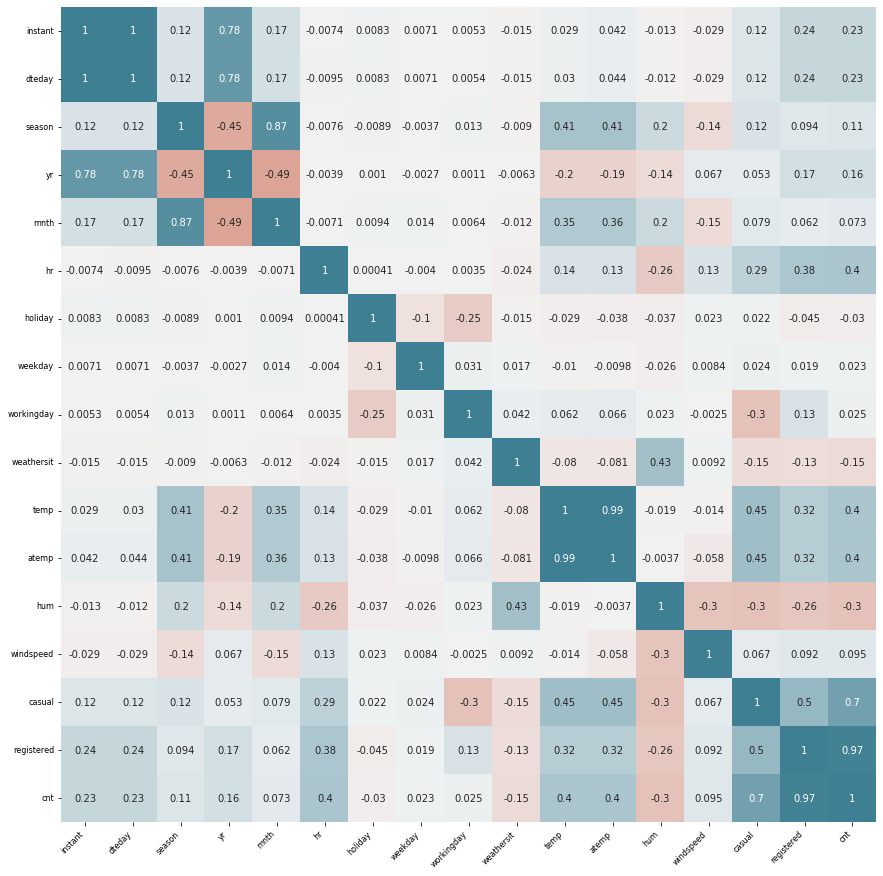

In [16]:
corr_matrix = train.select_dtypes(include=['float64', 'int']).corr(method='pearson')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Construyamos el modelo de Machine Learning. 
Utilizaré Regresión Lineal ya que la tendencia entre las fechas y el número de bicicletas es lineal.

Coeficiente [0.23910917] Intersección -175441.1783611522


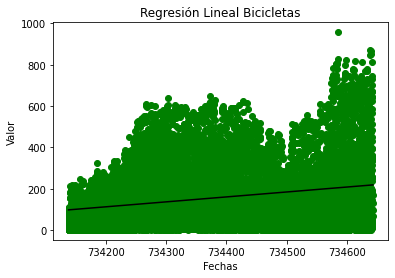

In [17]:
x=train['dteday']
x=np.array(x)
y=train['cnt']
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1,1)
model.fit(X,y)
y_fit=model.predict(X)
print('Coeficiente', model.coef_, 'Intersección', model.intercept_)

# 
plt.figure()
plt.scatter(x,y,color='Green')
plt.plot(X,y_fit, color='Black')
plt.title('Regresión Lineal Bicicletas')
plt.ylabel('Valor')
plt.xlabel('Fechas')
plt.show()

In [18]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)
print('RMSE Datos Entrenados',mean_squared_error(y_train,y_train_pred, squared=False))
print('RMSE Datos de Prueba',mean_squared_error(y_test,y_test_pred, squared=False))


RMSE Datos Entrenados 147.87828180588312
RMSE Datos de Prueba 145.23452629957762


Utilizando el Dataset TEST

In [19]:
test['dteday']=test['dteday'].map(dt.datetime.toordinal)

In [20]:
X_test=np.array(test['dteday']).reshape(-1,1)
y_test_pred=model.predict(X_test)

Creando el archivo csv para entrega 

In [21]:
entrega=pd.DataFrame(y_test_pred)
entrega.columns=['pred']
entrega.pred=entrega.pred.astype('int')
entrega.loc[entrega['pred']<0, 'pred']=0
entrega.to_csv('fvergara24.csv',index=False)

Regresión lineal con Temperatura

In [22]:
x=train['temp']
x=np.array(x)
y=train['cnt']
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1,1)
model.fit(X,y)
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=7)
model.fit(x_train,y_train)

y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
print('Coeficiente', model.coef_, 'Intersección', model.intercept_)
print('MSE Datos Entrenados',mean_squared_error(y_train,y_train_pred, squared=False))
print('MSE Datos de Prueba',mean_squared_error(y_test,y_test_pred, squared=False))

test['dteday']=test['dteday'].map(dt.datetime.toordinal)
X_test=np.array(test['dteday']).reshape(-1,1)
y_test_pred=model.predict()


Coeficiente [324.15649941] Intersección 8.01629601000215
MSE Datos Entrenados 138.88453463866833
MSE Datos de Prueba 139.6275653821605


TypeError: ignored

In [ ]:
entrega=pd.DataFrame(y_test_pred)
entrega.columns=['pred']
entrega.pred=entrega.pred.astype('int')
entrega.loc[entrega['pred']<0, 'pred']=0
entrega.to_csv('fvergara24.csv',index=False)

Con todas las columnas

In [ ]:
train['dteday']=train['dteday'].map(dt.datetime.toordinal)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        train.drop({'cnt','casual','registered'}, axis = 'columns'),
                                        train['cnt'],
                                        test_size   = 0.2,
                                        random_state = 27,
                                        shuffle      = True)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
print('RMSE Datos Entrenados',mean_squared_error(y_pred,y_test, squared=False))

In [ ]:
print(r2_score(y_pred,y_test))

In [ ]:
pred=pd.DataFrame(y_pred)

In [ ]:
test['dteday']=test['dteday'].map(dt.datetime.toordinal)

In [ ]:
y_pred_test
entrega=pd.DataFrame(y_pred_test)
entrega.columns=['pred']
entrega.pred=entrega.pred.astype('int')
entrega.loc[entrega['pred']<0, 'pred']=0
entrega.to_csv('fvergara24.csv',index=False)